In [1]:
import sys
sys.path.append('../src')  # Adds the parent directory to the Python path
from astropy.io import fits
from astropy.wcs import WCS
from dfreproject import calculate_reprojection
from sunpy.data.sample import AIA_193_JUN2012, STEREO_A_195_JUN2012
import matplotlib.pyplot as plt
import torch
from astropy.io.fits import PrimaryHDU
from dfreproject import TensorHDU

TypeError: Image data of dtype object cannot be converted to float

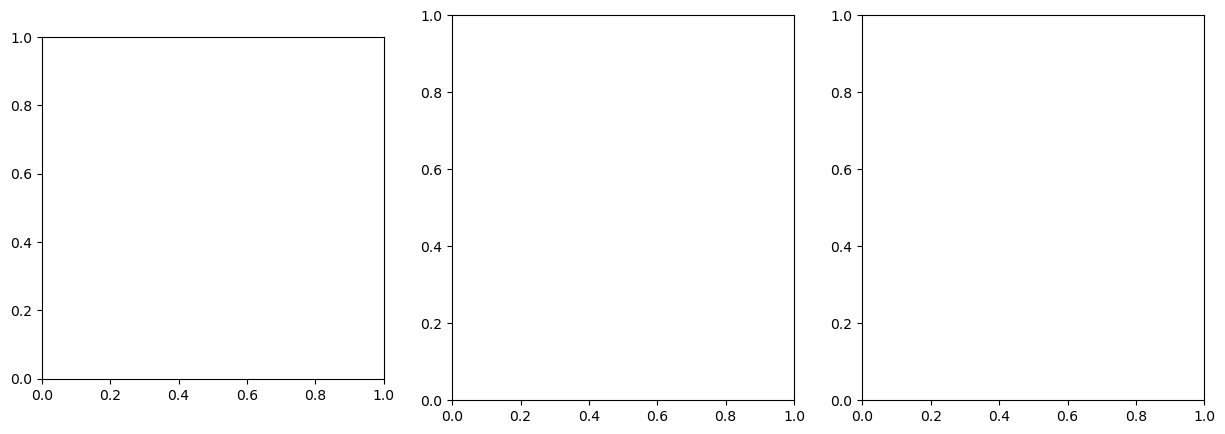

In [ ]:

# Load source and target images
source_hdu = fits.open(AIA_193_JUN2012)[1]
target_hdu = fits.open(STEREO_A_195_JUN2012)[1]

# source_hdu = (torch.tensor(source_hdu.data, requires_grad=True), source_hdu.header)

source_hdu = TensorHDU(torch.tensor(source_hdu.data, requires_grad=True), source_hdu.header)
target_hdu = PrimaryHDU(target_hdu.data, header=target_hdu.header)
target_wcs = WCS(target_hdu.header)
# Perform dfreproject with bilinear interpolation
reprojected = calculate_reprojection(
    source_hdus=source_hdu,
    target_wcs=target_wcs,
    shape_out=target_hdu.data.shape,
    order='bilinear',
    requires_grad=True,
)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(source_hdu.data, cmap='magma')
axes[0].set_title('Source (AIA)')
axes[1].imshow(target_hdu.data, cmap='viridis')
axes[1].set_title('Target (STEREO)')
axes[2].imshow(reprojected, cmap='magma')
axes[2].set_title('Reprojected (AIA to STEREO)')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()
